In [1]:
import h5py
from scipy.optimize import curve_fit
import numpy as np
def gaussian(x, A, x0, sigma):
    return A * np.exp((-(x - x0)**2) / (2*sigma**2))
err_red = []
err_blue = []
file_red = ['1414_35','1416_32','1418_02','1419_36','1421_33','1423_30','1425_00','1426_08','1427_42','1429_38']
file_blue = ['1413_37','1415_33','1417_29','1418_38','1420_35','1422_32','1424_27','1425_34','1426_43','1428_40']
for red in file_red:
    #print(red)
    filename = 'D:/Programming/Test/data_heating_rate/'+red+'.h5'
    f = h5py.File(filename, 'r')
    #print(f['scan_data'].keys())
    y = f["scan_data"]["CalibRed-ion number:0"][:]
    x = f["scan_data"]["Spectrum.sideband_detuning"][:]
    global_max = x[np.argmax(x)]
    popt, pcov = curve_fit(gaussian, x, y, p0=[0.5, global_max, 500.0])
    err_red.append(popt[2])
for blue in file_blue:
    #print(blue)
    filename = 'D:/Programming/Test/data_heating_rate/'+blue+'.h5'
    f = h5py.File(filename, 'r')
    #print(f['scan_data'].keys())
    y = f["scan_data"]["CalibBlue-ion number:0"][:]
    x = f["scan_data"]["Spectrum.sideband_detuning"][:]
    global_max = x[np.argmax(x)]
    popt, pcov = curve_fit(gaussian, x, y, p0=[0.5, global_max, 500.0])
    err_blue.append(popt[2])

OSError: Unable to open file (unable to open file: name = 'D:/Programming/Test/data_heating_rate/1414_35.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [7]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [8]:
def sin_func(x, freq, phase, B, A):
    return A * np.sin(freq * x + phase) + B

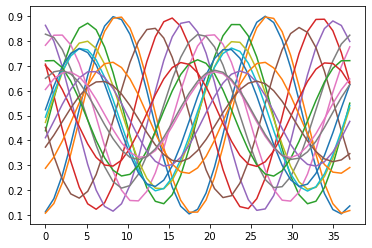

In [9]:
data = ['1508_02','1524_15','1529_49','1549_22','1553_59','1558_05','1602_17','1606_27','1610_33','1614_40','1618_45','1622_51','1626_59','1632_09','1637_17','1658_45','1703_54','1709_02']
wait_time = [2, 3, 4, 5, 6, 7, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
contrast = []; error = []
final_result = []

for i in range(len(data)):
    data_temp = data[i]
    filename = 'D:/OneDrive/STUDY/Research Now/Hyper-Ramsey (Ion Trap)/#14-Experiment Taking Data/data/'+data_temp+'.h5'
    f = h5py.File(filename, 'r')
    #print(f['scan_data'].keys())
    y = f["scan_data"]["Ramsey-ion number:0"][:]
    x = np.linspace(0,len(y),len(y))
    p0 = [0.3, 0.5, 0.3, 0.5]
    popt, pcov = curve_fit(sin_func, x, y, p0)
    p_sigma = np.sqrt(np.diag(pcov))
    error.append(p_sigma[-1])
    y_fit = sin_func(x, *popt); y_0 = sin_func(x, *p0)
    plt.plot(x, y_fit); #plt.plot(x, y); #plt.plot(x, y_0)
    contrast.append(popt[-1])

In [10]:
import scipy.optimize as fitter
def linear_func(x, a0, a1):
    return a0 + a1 * x

par0 = np.array([0.5, -1]) # initial guess for parameters
par, cov = fitter.curve_fit(linear_func, wait_time, final_result, par0, sigma=error, absolute_sigma=True)

final_line = []
for i in range(len(wait_time)):
    final_line.append(linear_func(wait_time[i], *par))

NameError: name 'final_result' is not defined

In [11]:
print(par[-1])

NameError: name 'par' is not defined

In [ ]:
final_result = 2*np.abs(contrast)

import matplotlib
matplotlib.rcParams.update(
        {"font.family": "STIXGeneral",
         "xtick.labelsize": 20,
         "xtick.direction": "in",
         "xtick.major.pad": 8,
         "xtick.top": True,
         "ytick.labelsize": 20,
         "ytick.direction": "in",
         "ytick.right": True,
         "axes.labelsize": 20,
         "axes.labelpad": 10,
         "axes.grid": True
    }
)

'''plt.plot'''
plt.figure(figsize = (15, 10))
plt.rc('font',family='STIXGeneral')
#plt.scatter(t_list, result0, color='k', marker='o', linewidths = 5)
plt.errorbar(wait_time, final_result, marker="o", lw=0, yerr=error, elinewidth=1.5, color="C0")
plt.title('Contrast Change', fontdict={'family' : 'STIXGeneral', 'size':25})
plt.xlabel('T (ms)', fontdict={'family' : 'STIXGeneral', 'size':20})
plt.ylabel('Contrast (range from 0 to 1)', fontdict={'family' : 'STIXGeneral', 'size':20})
plt.yticks(fontproperties='STIXGeneral', size=15)
plt.xticks(fontproperties='STIXGeneral', size=15)
plt.ylim(0, 1)
plt.plot(wait_time, final_line, 'k--', lw=1.5)
plt.legend(("Slope = -0.018", "Contrast"), fontsize=20)
plt.grid(True)
plt.savefig('./data.jpg')
plt.show()

In [ ]:
initial = []
for i in range(len(data)):
    if(i == 0):
        initial.append([0.5, 0.5, 0.1, 0.5])
    if(i == 1):
        initial.append([0.3, 0.5, 0.3, 0.5])
    if(i == 2):
        initial.append([0.3, 0.5, 0.3, 0.5])
    if(i == 3):
        initial.append([0.3, 0.5, 0.3, 0.5])
    if(i == 4):
        initial.append([0.3, 0.5, 0.3, 0.5])
    if(i == 5):
        initial.append([0.3, 0.5, 0.3, 0.5])
    if(i == 6):
        initial.append([0.3, 0.5, 0.3, 0.5])
    if(i == 7):
        initial.append([0.3, 0.5, 0.3, 0.5])
    if(i == 8):
        initial.append([0.3, 0.5, 0.3, 0.5])
    if(i == 9):
        initial.append([0.3, 0.5, 0.3, 0.5])
    if(i == 10):
        initial.append([0.3, 0.5, 0.3, 0.5])
    if(i == 11):
        initial.append([0.3, 0.5, 0.3, 0.5])
    if(i == 12):
        initial.append([0.3, 0.5, 0.3, 0.5])
    if(i == 13):
        initial.append([0.3, 0.5, 0.3, 0.5])
    if(i == 14):
        initial.append([0.3, 0.5, 0.3, 0.5])
    if(i == 15):
        initial.append([0.3, 0.5, 0.3, 0.5])
    if(i == 16):
        initial.append([0.3, 0.5, 0.3, 0.5])
    if(i == 17):
        initial.append([0.5, 0.5, 0.1, 0.5])

In [6]:
import pandas as pd
dataframe = pd.DataFrame({'wait_time':wait_time,'contrast':final_result,'error_bar':error})
dataframe.to_csv("ramsey_contrast.csv",index=False,sep=',')

NameError: name 'final_result' is not defined